Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

C:\Users\zeina\AppData\Local\Temp\ipykernel_22856\1788427490.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


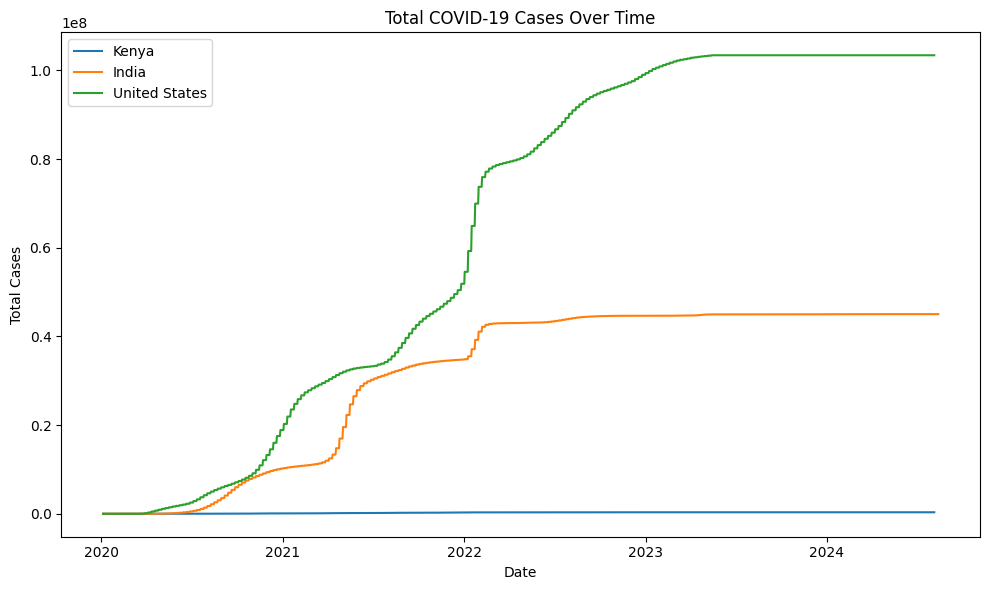

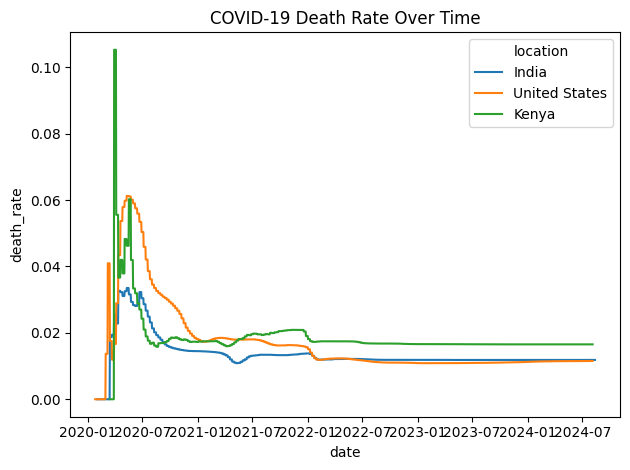

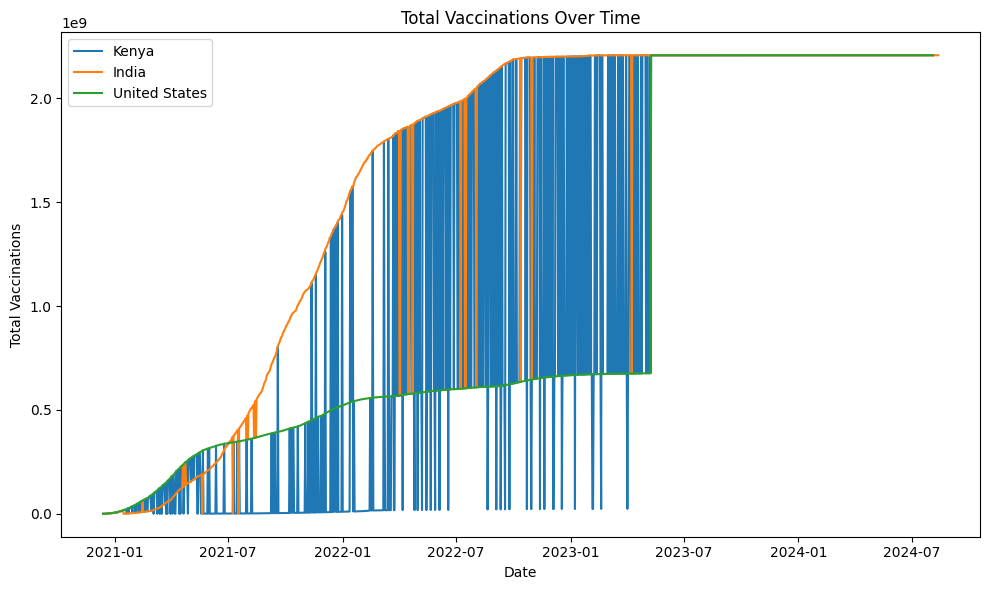

In [1]:
# COVID-19 Global Data Tracker - Jupyter Notebook Template

# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 2. Load the Dataset
file_path = 'data/owid-covid-data.csv'
df = pd.read_csv(file_path)

# 3. Explore Dataset
print(df.columns)
print(df.head())
print(df.isnull().sum())

# 4. Data Cleaning
countries = ['Kenya', 'India', 'United States']
df = df[df['location'].isin(countries)]
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.fillna(method='ffill')

# 5. Exploratory Data Analysis
import os
os.makedirs("visuals", exist_ok=True)

plt.figure(figsize=(10, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.savefig('visuals/total_cases.png')
plt.show()

# 6. Death Rate Analysis
df['death_rate'] = df['total_deaths'] / df['total_cases']
sns.lineplot(data=df, x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rate Over Time')
plt.tight_layout()
plt.savefig('visuals/death_rate.png')
plt.show()

# 7. Vaccination Analysis
plt.figure(figsize=(10, 6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.savefig('visuals/total_vaccinations.png')
plt.show()

# 8. Optional: Choropleth Map (Latest Date)
import os
os.makedirs("output", exist_ok=True)

latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date][['iso_code', 'location', 'total_cases']]
fig = px.choropleth(latest_df, locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title=f'Total COVID-19 Cases as of {latest_date.date()}')
fig.write_html('output/choropleth_cases.html')
fig.show()

